# <font><center>**G2M insight for Cab Investment firm**</center></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

In [14]:
# read data
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv', sep=',', low_memory=False)
city = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv', sep=',', low_memory=False)
customer_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv', sep=',', low_memory=False)
transaction_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv', sep=',', low_memory=False)

In [15]:
# create new database
db = cab_data
# add Profit
spread_col = round(db['Price Charged'] - db['Cost of Trip'], 2)
db.insert(7, 'Profit', spread_col)
db = db.drop(columns=['Price Charged', 'Cost of Trip'])
# change date format
db['Date of Travel']=db['Date of Travel'].apply(lambda t: date(1900, 1, 1) + timedelta(days=t-2))
db['Date of Travel'] = db['Date of Travel'].apply(lambda _: pd.to_datetime(_,format='%Y-%m-%d'))


,Transaction ID,Date of Travel,Company,City,KM Travelled,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,57.32
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,23.67
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,27.57
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,25.80
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,16.84
...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,5.88
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,6.90
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,87.42
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,32.14


In [16]:
# merging
db = pd.merge(db, transaction_id[['Transaction ID', 'Customer ID']], left_on='Transaction ID', right_on='Transaction ID')
change_column = ['Transaction ID', 'Customer ID', 'Date of Travel', 'Company', 'City', 'KM Travelled', 'Profit']
db = db.reindex(columns=change_column)

In [17]:
db = pd.merge(db, customer_id[['Customer ID', 'Gender', 'Age']], left_on='Customer ID', right_on='Customer ID')

In [18]:
db = pd.merge(db, city, left_on='City', right_on='City')

In [19]:
db = pd.merge(db, transaction_id[['Transaction ID', 'Payment_Mode']], left_on='Transaction ID', right_on='Transaction ID')

In [20]:
# check data in database
db.head()

,Transaction ID,Customer ID,Date of Travel,Company,City,KM Travelled,Profit,Gender,Age,Population,Users,Payment_Mode
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,57.32,Male,28,"814,885","24,701",Card
1,10351127,29290,2018-07-21,Yellow Cab,ATLANTA GA,26.19,281.28,Male,28,"814,885","24,701",Cash
2,10412921,29290,2018-11-23,Yellow Cab,ATLANTA GA,42.55,194.65,Male,28,"814,885","24,701",Card
3,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,23.67,Male,27,"814,885","24,701",Card
4,10320494,27703,2018-04-21,Yellow Cab,ATLANTA GA,36.38,253.98,Male,27,"814,885","24,701",Card


In [21]:
db['Customer ID'].duplicated().any()

True

In [22]:
db['Transaction ID'].duplicated().any()

False

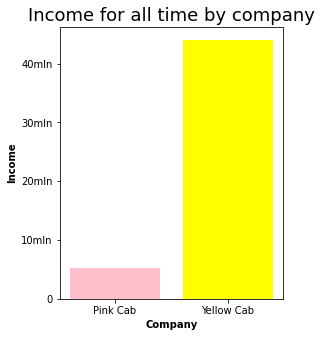

In [23]:
# Chart 1
plt.figure(figsize=(4,5))
plt.title('Income for all time by company', fontsize=18)
plt.style.use('fivethirtyeight')
plt.xlabel('Company', fontweight='bold')
plt.ylabel('Income', fontweight='bold')

profit_by_company = db[['Company', 'Profit']].groupby('Company').sum().reset_index()

plt.bar(profit_by_company['Company'], profit_by_company['Profit'], color=['pink', 'yellow'])
plt.yticks(ticks=(0, 10000000, 20000000, 30000000, 40000000), labels=("0", "10mln", "20mln", "30mln", "40mln"))

plt.show()

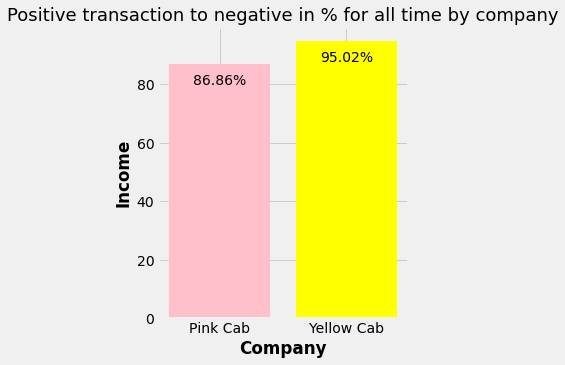

In [24]:
# Chart 1.1
plt.figure(figsize=(4,5))
plt.title('Positive transaction to negative in % for all time by company', fontsize=18)
plt.xlabel('Company', fontweight='bold')
plt.ylabel('Income', fontweight='bold')

positive_tran = db[['Company', 'Profit']].copy()
positive_tran = positive_tran[positive_tran['Profit'] >= 0].groupby('Company').count()
positive_tran.insert(0, 'All_tran', db[['Company','Profit']].groupby('Company').count())
positive_tran_perc = round(positive_tran['Profit'] * 100 / positive_tran['All_tran'], 2)
positive_tran.insert(2, 'Percent_of_positive', positive_tran_perc)

plt.bar(positive_tran.index, positive_tran['Percent_of_positive'], color=['pink', 'yellow'])

plt.annotate(str(str(positive_tran['Percent_of_positive'][0]) + '%'), xy=(0, 80), ha='center')
plt.annotate(str(str(positive_tran['Percent_of_positive'][1]) + '%'), xy=(1, 88), ha='center')

plt.show()

In [25]:
profit_per = db[['Company', 'Date of Travel', 'Profit']].copy()

profit_per.insert(1, 'Day', profit_per['Date of Travel'].dt.day.apply(lambda x: int(x)))
profit_per.insert(2, 'Weekday', profit_per['Date of Travel'].dt.weekday.apply(lambda x: int(x)))
profit_per.insert(3, 'Month', profit_per['Date of Travel'].dt.month.apply(lambda x: int(x)))
profit_per.insert(4, 'Quarter', profit_per['Date of Travel'].dt.quarter.apply(lambda x: str(x)))
profit_per.insert(5, 'Year', profit_per['Date of Travel'].dt.year.apply(lambda x: str(x)))

profit_per

,Company,Day,Weekday,Month,Quarter,Year,Date of Travel,Profit
0,Pink Cab,8,4,1,1,2016,2016-01-08,57.32
1,Yellow Cab,21,5,7,3,2018,2018-07-21,281.28
2,Yellow Cab,23,4,11,4,2018,2018-11-23,194.65
3,Pink Cab,6,2,1,1,2016,2016-01-06,23.67
4,Yellow Cab,21,5,4,2,2018,2018-04-21,253.98
...,...,...,...,...,...,...,...,...
359387,Yellow Cab,3,5,3,1,2018,2018-03-03,143.62
359388,Yellow Cab,13,4,4,2,2018,2018-04-13,23.05
359389,Yellow Cab,6,4,7,3,2018,2018-07-06,-5.85
359390,Yellow Cab,2,3,8,3,2018,2018-08-02,-6.09


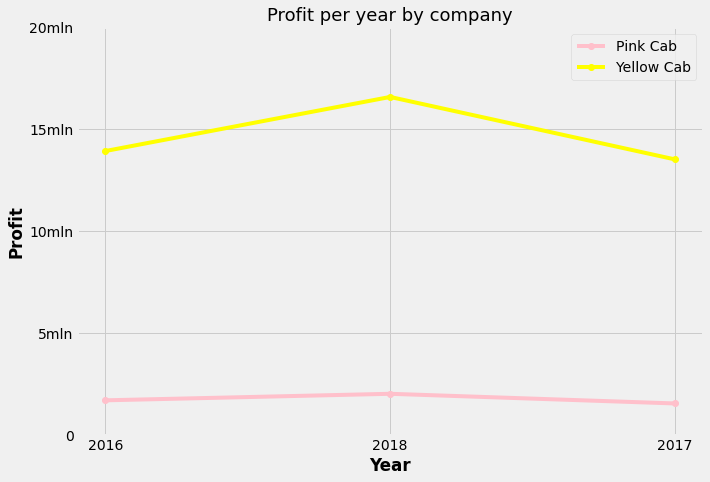

In [26]:
# Chart 2
plt.figure(figsize=(10,7))
plt.title('Profit per year by company', fontsize=18)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')

profit_per_year = profit_per.groupby(['Company', 'Year']).sum('Profit').reset_index()
years = profit_per['Year'].unique()

plt.plot(years, profit_per_year['Profit'][profit_per_year['Company']=='Pink Cab'], color='pink', marker='o', label='Pink Cab')
plt.plot(years, profit_per_year['Profit'][profit_per_year['Company']=='Yellow Cab'], color='yellow', marker='o', label='Yellow Cab')

plt.ylim(0, 18000000)
plt.yticks(ticks=(0,5000000, 10000000, 15000000, 20000000), labels=('0', '5mln', '10mln', '15mln', '20mln'))

plt.legend()
plt.show()

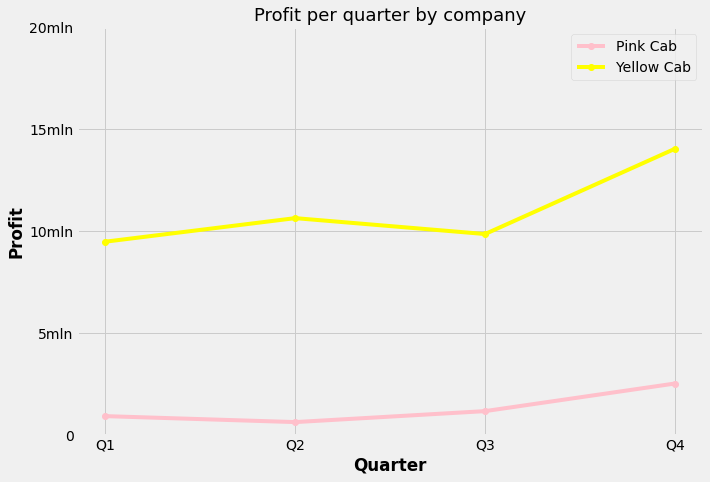

In [27]:
# Chart 3
plt.figure(figsize=(10,7))
plt.title('Profit per quarter by company', fontsize=18)
plt.xlabel('Quarter', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')

profit_per_quarter = profit_per.groupby(['Company', 'Quarter']).sum('Profit').sort_values('Quarter').reset_index()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
# quarters = quarters.sort()

plt.plot(quarters, profit_per_quarter['Profit'][profit_per_quarter['Company']=='Pink Cab'], color='pink', marker='o', label='Pink Cab')
plt.plot(quarters, profit_per_quarter['Profit'][profit_per_quarter['Company']=='Yellow Cab'], color='yellow', marker='o', label='Yellow Cab')

plt.ylim(0, 18000000)
plt.yticks(ticks=(0,5000000, 10000000, 15000000, 20000000), labels=('0', '5mln', '10mln', '15mln', '20mln'))

plt.legend()
plt.show()

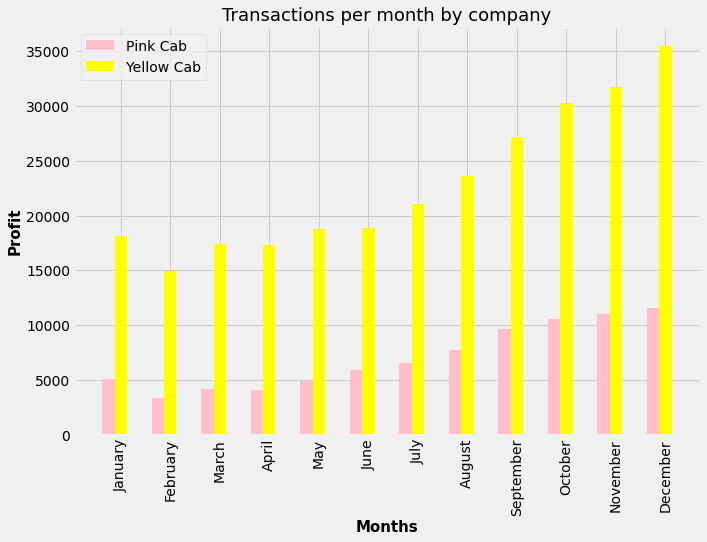

In [28]:
# Chart 4
plt.figure(figsize=(10,7))
plt.title('Transactions per month by company', fontsize=18)

profit_per_month = profit_per.groupby(['Company', 'Month']).count().reset_index().sort_values('Month')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

PC = profit_per_month['Profit'][profit_per_month['Company']=='Pink Cab']
YC = profit_per_month['Profit'][profit_per_month['Company']=='Yellow Cab']
 
barWidth = 0.25
br1 = range(12)
br2 = [x + barWidth for x in br1]

plt.bar(br1, PC, color='pink', label='Pink Cab', width = barWidth)
plt.bar(br2, YC, color='yellow', label='Yellow Cab', width = barWidth)
 
plt.xlabel('Months', fontweight ='bold', fontsize = 15)
plt.ylabel('Profit', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(PC))], months)

plt.xticks(rotation=90, ha='center')
plt.legend()
plt.show()

In [29]:
profit_by_weekday = profit_per.groupby(['Company', 'Weekday']).count().reset_index().sort_values('Weekday')
profit_by_weekday

,Company,Weekday,Day,Month,Quarter,Year,Date of Travel,Profit
0,Pink Cab,0,7032,7032,7032,7032,7032,7032
7,Yellow Cab,0,22705,22705,22705,22705,22705,22705
1,Pink Cab,1,7077,7077,7077,7077,7077,7077
8,Yellow Cab,1,22783,22783,22783,22783,22783,22783
2,Pink Cab,2,7076,7076,7076,7076,7076,7076
9,Yellow Cab,2,23026,23026,23026,23026,23026,23026
3,Pink Cab,3,9549,9549,9549,9549,9549,9549
10,Yellow Cab,3,30198,30198,30198,30198,30198,30198
4,Pink Cab,4,19249,19249,19249,19249,19249,19249
11,Yellow Cab,4,62153,62153,62153,62153,62153,62153


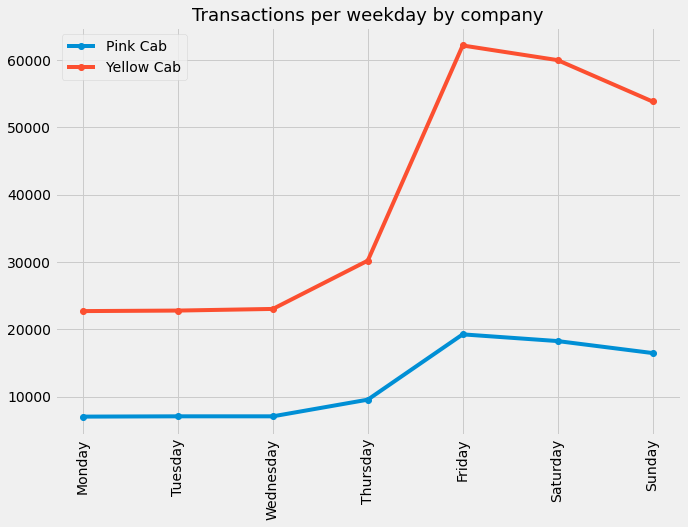

In [30]:
# Chart 5
plt.figure(figsize=(10,7))
plt.title('Transactions per weekday by company', fontsize=18)

PC = profit_by_weekday['Profit'][profit_by_weekday['Company']=='Pink Cab']
YC = profit_by_weekday['Profit'][profit_by_weekday['Company']=='Yellow Cab']

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.plot(weekdays, PC, label='Pink Cab', marker='o')
plt.plot(weekdays, YC, label='Yellow Cab', marker='o')

plt.xticks(rotation=90, ha='center')
plt.legend()
plt.show()

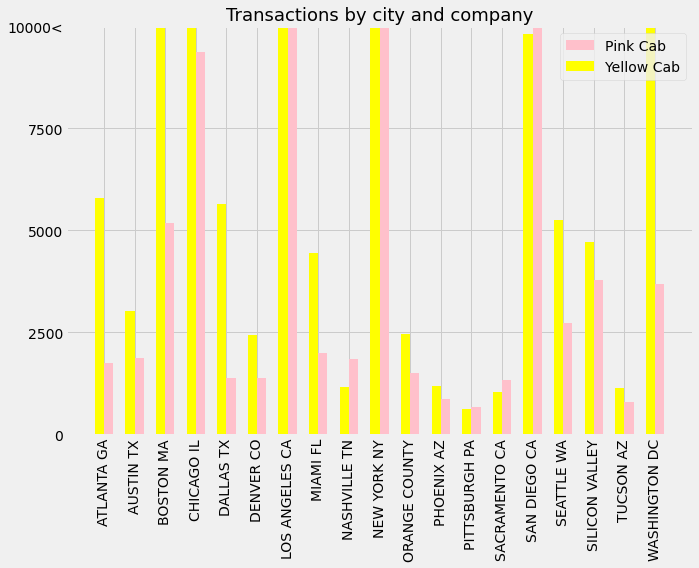

In [31]:
# Chart 6
plt.figure(figsize=(10,7))
plt.title('Transactions by city and company', fontsize=18)

profit_by_city = db[['Company', 'Profit', 'City']].copy()
profit_by_city = profit_by_city.groupby(['Company', 'City']).count().reset_index()
cities = profit_by_city['City'].unique()

plt.bar(cities,profit_by_city['Profit'][profit_by_city['Company']=='Pink Cab'], label='Pink Cab', color='pink', width= 0.3,  align='edge')
plt.bar(cities,profit_by_city['Profit'][profit_by_city['Company']=='Yellow Cab'], label='Yellow Cab', color='yellow', width= -0.3,  align='edge')
plt.xticks(rotation=90, ha='center')

plt.ylim(0, 10000)
plt.yticks(ticks=(0, 2500, 5000, 7500, 10000), labels=("0", "2500", "5000", "7500", "10000<"))

plt.legend()
plt.show()

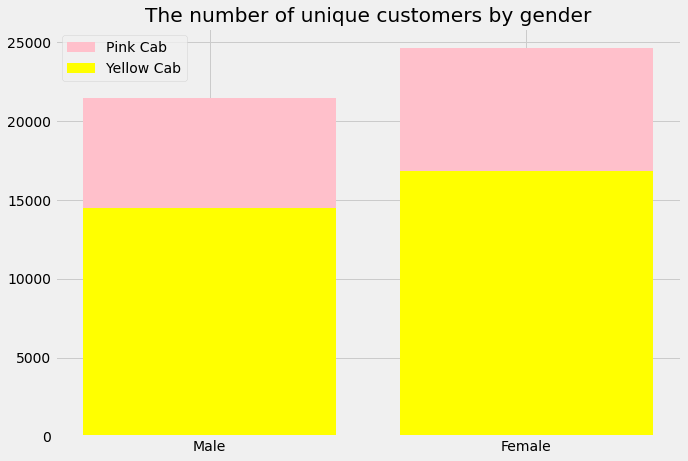

In [32]:
# Chart 7
plt.figure(figsize=(10,7))
plt.title('The number of unique customers by gender')

unique_customers = db.copy().drop_duplicates('Customer ID')

data_y = unique_customers.groupby(['Gender', 'Company']).count().reset_index().sort_values('Gender')
data_x = unique_customers['Gender'].unique()

data1 = data_y['Customer ID'][data_y['Company']=='Pink Cab']
data2 = data_y['Customer ID'][data_y['Company']=='Yellow Cab']

plt.bar(data_x, data1, label="Pink Cab", color='pink', bottom=data2)
plt.bar(data_x, data2, label="Yellow Cab", color='yellow')

plt.legend(loc="upper left")
plt.show()

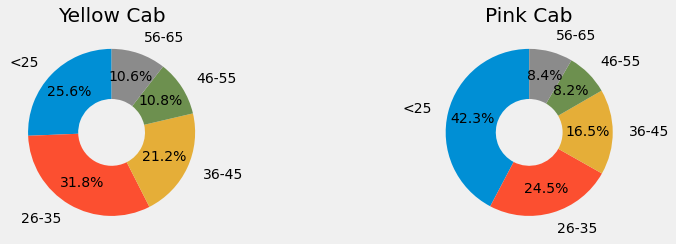

In [228]:
# Chart 8
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
plt.title('The number of unique customers by age')
plt.subplots_adjust(wspace=1)

age_to_25_y = unique_customers['Age'][unique_customers['Age'] <= 25].where(unique_customers['Company']=='Yellow Cab').count()
age_26_to_35_y = unique_customers['Age'][(unique_customers['Age'] > 25) & (unique_customers['Age'] <= 35)].where(unique_customers['Company']=='Yellow Cab').count()
age_36_to_45_y = unique_customers['Age'][(unique_customers['Age'] > 35) & (unique_customers['Age'] <= 45)].where(unique_customers['Company']=='Yellow Cab').count()
age_46_to_55_y = unique_customers['Age'][(unique_customers['Age'] > 45) & (unique_customers['Age'] <= 55)].where(unique_customers['Company']=='Yellow Cab').count()
age_56_to_65_y = unique_customers['Age'][(unique_customers['Age'] > 55) & (unique_customers['Age'] <= 65)].where(unique_customers['Company']=='Yellow Cab').count()

age_to_25_p = unique_customers['Age'][unique_customers['Age'] <= 25].where(unique_customers['Company']=='Yellow Cab').count()
age_26_to_35_p = unique_customers['Age'][(unique_customers['Age'] > 25) & (unique_customers['Age'] <= 35)].where(db['Company']=='Pink Cab').count()
age_36_to_45_p = unique_customers['Age'][(unique_customers['Age'] > 35) & (unique_customers['Age'] <= 45)].where(db['Company']=='Pink Cab').count()
age_46_to_55_p = unique_customers['Age'][(unique_customers['Age'] > 45) & (unique_customers['Age'] <= 55)].where(db['Company']=='Pink Cab').count()
age_56_to_65_p = unique_customers['Age'][(unique_customers['Age'] > 55) & (unique_customers['Age'] <= 65)].where(db['Company']=='Pink Cab').count()

ranges = ['<25', '26-35', '36-45', '46-55', '56-65']
ages_y = [age_to_25_y, age_26_to_35_y, age_36_to_45_y, age_46_to_55_y, age_56_to_65_y]
ages_p = [age_to_25_p, age_26_to_35_p, age_36_to_45_p, age_46_to_55_p, age_56_to_65_p]

ax[0].pie(ages_y,
       wedgeprops={'width':0.6},
       startangle=90,
       autopct='%1.1f%%',
       pctdistance=0.7,
       labels=ranges,
       labeldistance=1.2)

ax[1].pie(ages_p,
       wedgeprops={'width':0.6},
       startangle=90,
       autopct='%1.1f%%',
       pctdistance=0.7,
       labels=ranges,
       labeldistance=1.2)

ax[0].set_title('Yellow Cab')
ax[1].set_title('Pink Cab')
plt.show()

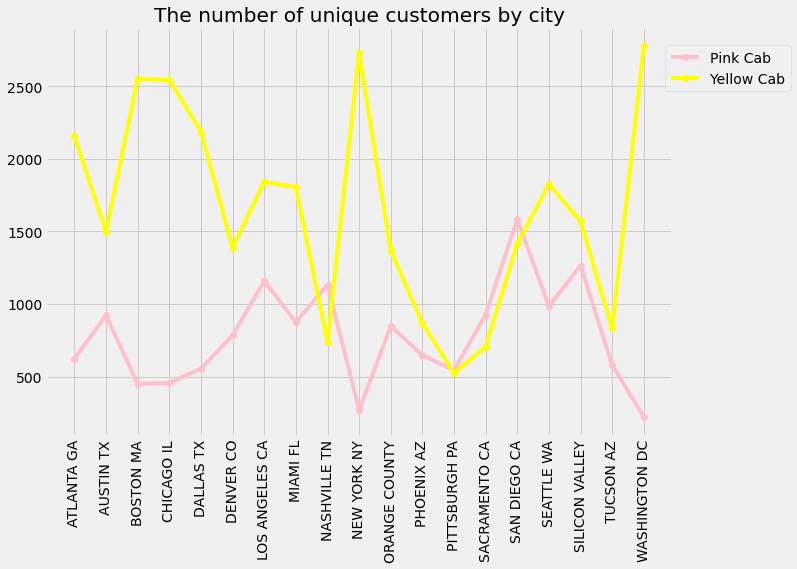

In [230]:
# Chart 9
plt.figure(figsize=(10,7))
plt.title('The number of unique customers by city')

cities = unique_customers['City'].unique()

unique_customers_by_city = unique_customers.groupby(['Company','City'])['Customer ID'].count().reset_index().sort_values('City')

plt.plot(cities, unique_customers_by_city['Customer ID'][unique_customers_by_city['Company']=='Pink Cab'], color='pink', linestyle='-', marker='o', label='Pink Cab')
plt.plot(cities, unique_customers_by_city['Customer ID'][unique_customers_by_city['Company']=='Yellow Cab'], color='yellow', linestyle='-', marker='o', label='Yellow Cab')

plt.xticks(rotation=90, ha='center')
plt.legend(loc="center right", bbox_to_anchor=(1.2, 0.9))
plt.show()

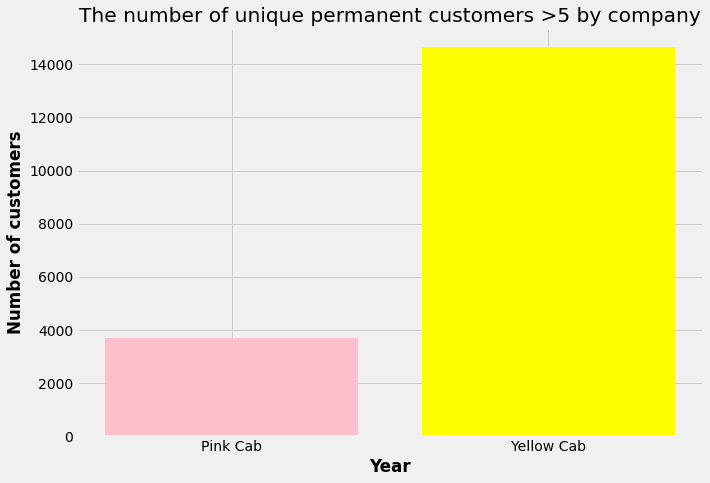

In [231]:
# Chart 10
plt.figure(figsize=(10,7))
plt.title('The number of unique permanent customers >5 by company')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of customers', fontweight='bold')

cust_p = db[['Company', 'Customer ID']][(db['Company']=='Pink Cab')].groupby('Customer ID').count()
num_per_cust_p = cust_p[cust_p['Company']>5].count()
cust_y = db[['Company', 'Customer ID']][(db['Company']=='Yellow Cab')].groupby('Customer ID').count()
num_per_cust_y = cust_y[cust_y['Company']>5].count()

plt.bar('Pink Cab', num_per_cust_p, color='pink')
plt.bar('Yellow Cab', num_per_cust_y, color='yellow')

plt.show()

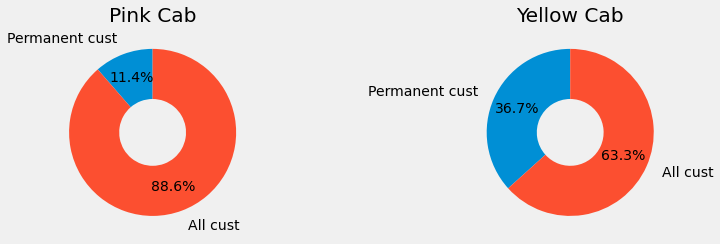

In [232]:
# Chart 11
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
plt.title('The number of unique permanent customers % by company')
plt.subplots_adjust(wspace=1)

p = round(num_per_cust_p * 100 / cust_p.count(), 2)
y = round(num_per_cust_y * 100 / cust_y.count(), 2)
     
p_per = pd.DataFrame([p, 100-p])
y_per = pd.DataFrame([y, 100-y])

ax[0].pie(p_per.Company,
       wedgeprops={'width':0.6},
       startangle=90,
       autopct='%1.1f%%',
       pctdistance=0.7,
       labeldistance=1.2,
       labels = ['Permanent cust', 'All cust'])

ax[1].pie(y_per.Company,
       wedgeprops={'width':0.6},
       startangle=90,
       autopct='%1.1f%%',
       pctdistance=0.7,
       labeldistance=1.2,
       labels = ['Permanent cust', 'All cust'])

ax[0].set_title('Pink Cab')
ax[1].set_title('Yellow Cab')
plt.show()

In [ ]:
# recommendation and hypothesis results
Based on the visualization results, we can draw the following conclusions:

1. The maximum revenues for the period 31.01.2016-31.12.2018 belong to the yellow cabin company.
2. Profitable transactions make up 95% of all transactions, as at that time the pink cab has only 86 percent.
3. 2018 can be considered a more profitable year, although the general trend does not have sharp changes, which indicates stability.
4. The most productive quarter for both companies is 4 (October, November, and December)
5. The number of transactions by month and day of the week is approximately two times greater in the yellow cab company than in the yellow cab, although the trends are as similar as possible.
6. Regarding the popularity of using these taxi companies in cities: in most of them it is equal, sometimes one or the other is better.
7. Women use taxi services more actively in both companies.
8. Pink cabs are more popular among young people under 25, and yellow cabs are more popular among customers aged 26-35.
9. The number of unique customers per company depends on the city.
New York, Washington - yellow cab, San Diego, Nashville - pink cab.
10. The number of customers who used a taxi is more than 5 times greater in the yellow cab company.
11. The percentage of regular customers to the total number is also higher in the yellow cab company, which indicates that people are interested in this company. 11.4% pink, 36.7% yellow cab.

The recommended company for investment will be Zhovtyi kab, as it has the most positive conclusions.